# Tesseract processing


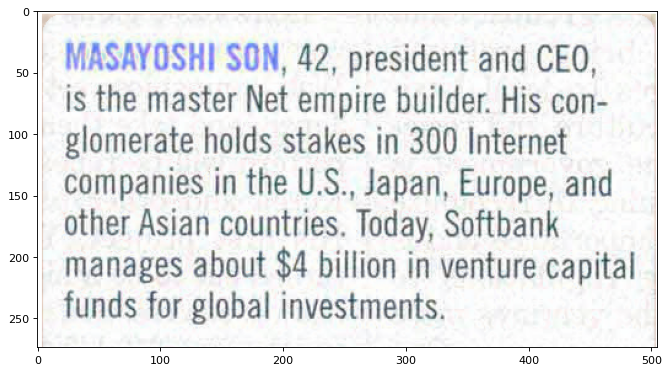

--psm 6
| MASAYOSHI SON, 42, president and CEO,

is the master Net empire builder. His con-
- glomerate holds stakes in 300 Internet !
_ companies in the U.S., Japan, Europe, and
_ other Asian countries. Today, Softbank
_ Manages about $4 billion in venture capital —
_ funds for global investments.



In [28]:
import matplotlib.pyplot as plt
import cv2 
import pytesseract
import numpy as np
import os
from pytesseract import Output
from pre_process import *
from utils import *
import re


DATA_PATH = "../../data"

def process_ocr(data_path,
                name_image, 
                psm = 3,
                oem = -1,
                dpi = -1,
                l = "",
                is_processing  = False):

     img_test_path = os.path.join(data_path, name_image)
     img = {'image'    : cv2.imread(img_test_path),
            'name_img' : name_image}

     # Preprocessing
     if (is_processing  == True ):
             pre_process = PreProcessing_engine(img['image'])
             # Tesseract does this internally (Otsu algorithm), but the result can be suboptimal,         
             output = Preprocessing_img_pipeline(img['image'], ['remove_shadow'])
     else : 
             output = img['image'].copy()
     visualize(output)
     
     # configuring parameters for tesseract
     ### oem : OCR Engine mode.
     ### psm : Page Segmentation mode 
     ### dpi : the resolution N in DPI 
     ### l   : the language or script to use

     custom_config = ""
     
     
     if (psm > 0):
          custom_config = f"--psm {psm}"
     elif (psm == 0):
           osd = pytesseract.image_to_osd(output)
           print(osd)
     if (oem >= 0) : 
          custom_config += f" --oem {oem}"
     if (dpi >= 0) : 
          custom_config += f" --dpi {dpi}"
     if (l != "") : 
          custom_config += f" -l {l}"
     
     print (custom_config)

     text = pytesseract.image_to_string(output, 
                                    config=custom_config)
     print(text)

     
     # feeding image to tesseract
     results = pytesseract.image_to_data(output, 
                                         output_type=Output.DICT,
                                         config=custom_config,
                                         )        
     img_box(results, 
             img['image'], 
             img['name_img'])        # save image 
     final_text = save_text_file(results)



PSM0_PATH = DATA_PATH +  "/psm0"
process_ocr(DATA_PATH,"bg_noise_4.png", psm = 6, is_processing=True)

In [ ]:
PSM0_PATH = DATA_PATH +  "/psm0"
img_test_path = os.path.join(PSM0_PATH, "org_60.png")
img = cv2.imread(img_test_path)

rotated = (img).copy()            
gray    = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
gray    = cv2.bitwise_not(gray)
# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,
     cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
print(angle)
angle = -angle
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)    

autre = rotated.copy()
cv2.imwrite("t.png", autre)
visualize(autre)

In [7]:
def check_osd(image):
        osd = pytesseract.image_to_osd(image)
        print(osd)

check_osd(autre)

Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 2.39
Script: Devanagari
Script confidence: 3.03



In [ ]:
process_ocr(PSM0_PATH,"test.png", psm = 3, l = "eng", is_processing=True)

In [24]:
from unicodedata import name
import cv2
import numpy as np
from scipy.ndimage import interpolation as inter

def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    corrected = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
            borderMode=cv2.BORDER_REPLICATE)

    return best_angle, corrected

if __name__ == '__main__':
    
    PSM0_PATH  = DATA_PATH +  "/psm0" 
    name_image = "org_60.png"

    img_test_path = os.path.join(PSM0_PATH, name_image)
    img = {'image'    : cv2.imread(img_test_path),
            'name_img' : name_image}
    angle, corrected = correct_skew(img['image'])
    print('Skew angle:', angle)
    cv2.imshow('corrected', corrected)
    cv2.waitKey()

/tmp/ipykernel_4031/919497795.py:8: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)


Skew angle: -5


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/tranquochung/.local/lib/python3.10/site-packages/cv2/qt/plugins"
Qt: Session management error: Could not open network socket


## Define all data path for each psm case

In [2]:
PSM0_PATH = DATA_PATH +  "/psm0"
PSM4_PATH = DATA_PATH +  "/psm4"
PSM5_PATH = DATA_PATH +  "/psm5"
PSM6_PATH = DATA_PATH +  "/psm6"
PSM7_PATH = DATA_PATH +  "/psm7"
PSM9_PATH = DATA_PATH +  "/psm9"
PSM11_PATH = DATA_PATH + "/psm11"
PSM13_PATH = DATA_PATH + "/psm13"

## PSM 0

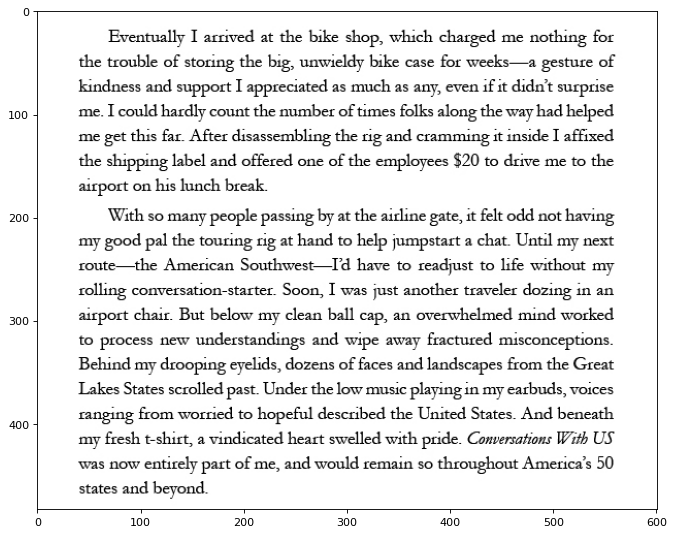

AttributeError: 'NoneType' object has no attribute 'groups'

In [12]:
process_ocr(PSM0_PATH,  "org.png", psm = 0)

## PSM 4

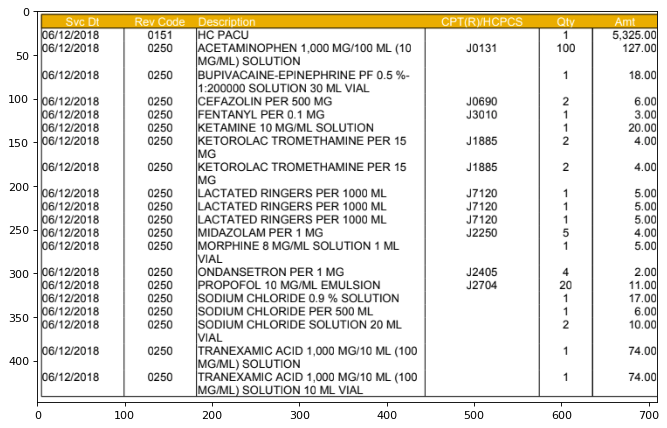

--psm 4
 

Perea Caras

06/12/2018 0151 [HC PACU 1 5,325.00

06/12/2018 0250 |ACETAMINOPHEN 1,000 MG/100 ML (10 0131 100 127.00
IMGIML) SOLUTION

6/12/2018 0250 _|BUPIVACAINE-EPINEPHRINE PF 0.5 %- 1 18.00
11:200000 SOLUTION 30 ML VIAL

6/12/2018 0250 _|CEFAZOLIN PER 500 MG J0690 2 6.00

06/12/2018 0250 FENTANYL PER 0.1 MG. 43010 1 3.00

06/12/2018 0250 _|KETAMINE 10 MG/ML SOLUTION 1 20.00

06/12/2018 0250 _|KETOROLAC TROMETHAMINE PER 15 1885 2 4.00
IMG

6/12/2018 0250 _|KETOROLAC TROMETHAMINE PER 15 1885 2 4.00
IMG

6/12/2018 0250 _|LACTATED RINGERS PER 1000 ML 7120 1 5.00

06/12/2018 0250 _|LACTATED RINGERS PER 1000 ML 7120 1 5.00

16/12/2018 0250 _|LACTATED RINGERS PER 1000 ML 7120 1 5.00

16/12/2018 0250 [MIDAZOLAM PER 1 MG. 12250 5 4.00

06/12/2018 0250 [MORPHINE 8 MG/ML SOLUTION 1 ML 1 5.00
IVIL.

6/12/2018 0250 _ |ONDANSETRON PER 1 MG 12405 4 2.00

06/12/2018 0250 |PROPOFOL 10 MG/ML EMULSION 2704 20 11.00

06/12/2018 0250 _|SODIUM CHLORIDE 0.9 % SOLUTION 1 17.00

16/12/2018 0250 

In [4]:
process_ocr(PSM4_PATH, "medical_bill.png", psm = 4)

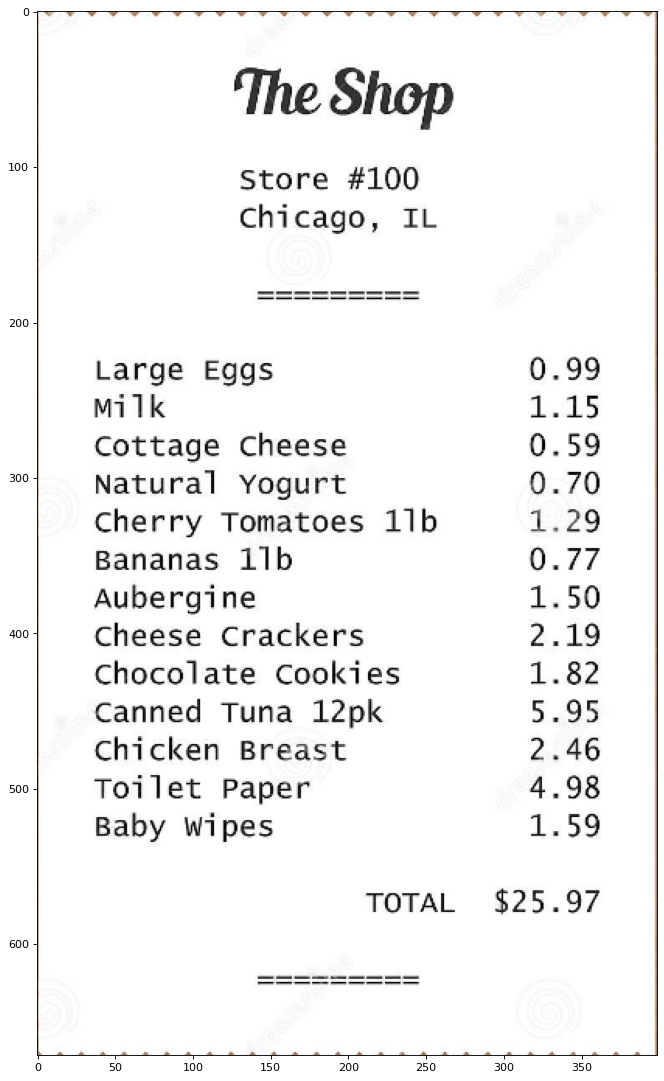

--psm 4
 

The Shop

Store #100
Chicago, IL

 

Large Eggs 0.99
Milk 1.15
Cottage Cheese 0.59
- Natural Yogurt 0.70
_ Cherry Tomatoes 11b 1.29
Bananas 11b 0.77
Aubergine 1.50
Cheese Crackers 2.19
Chocolate Cookies 1.82
Canned Tuna 12pk 5.95
Chicken Breast 2.46
Toilet Paper 4.98
Baby Wipes 1.59

 



In [5]:
process_ocr(PSM4_PATH, "receipt-grocery-store.png", psm = 4)

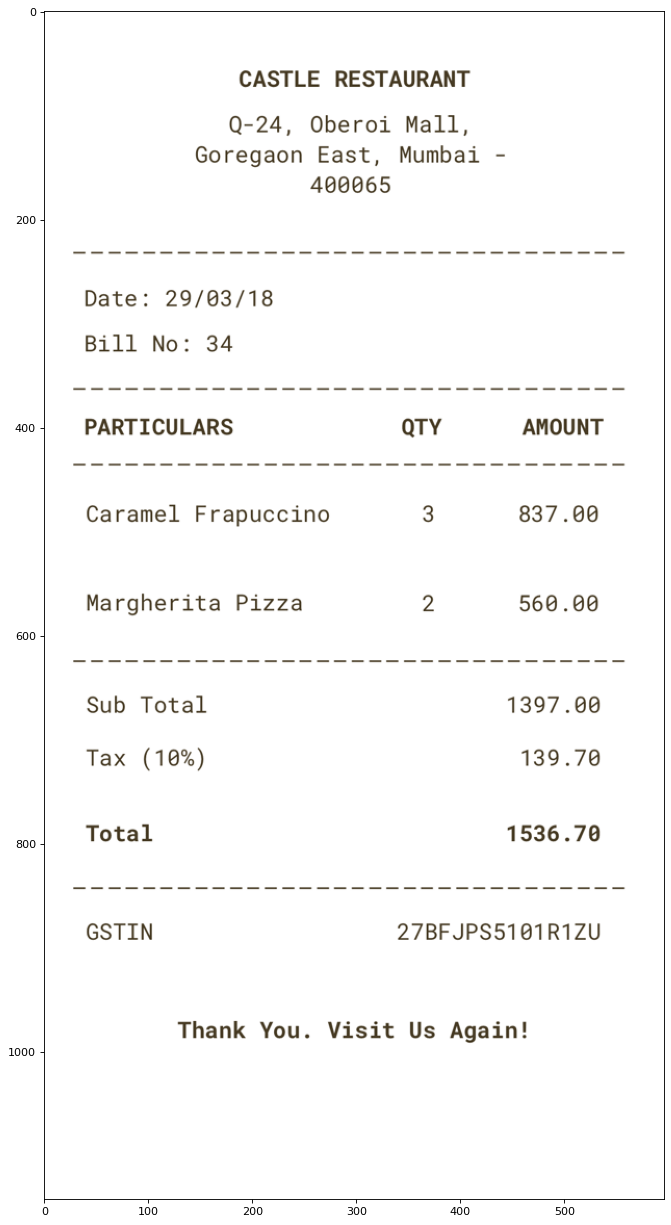

--psm 4
CASTLE RESTAURANT

Q-24, Oberoi Mall,
Goregaon East, Mumbai -

400065

Date: 29/03/18

Bill No: 34

PARTICULARS QTY AMOUNT
Caramel Frapuccino 3 837.60
Margherita Pizza 2 560.00
Sub Total 1397 .80
Tax (10%) 139.70
Total 1536.78
GSTIN 27BFJPS5101R1ZU

Thank You. Visit Us Again!



In [6]:
process_ocr(PSM4_PATH, "Bitmap-min.png", psm = 4, is_processing=True)

## PSM 5


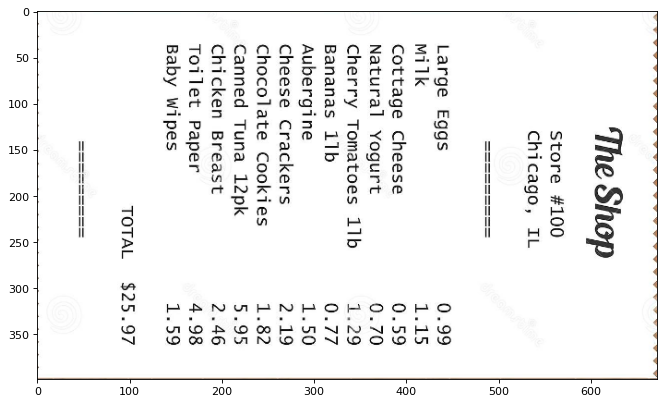

--psm 5
Store #100

Chicago, IL

Sessessss
Large Eggs 0.99
Milk 1.15
Cottage Cheese 0.59
Natural Yogurt 0.70
Cherry Tomatoes 11b 1.29
Bananas 11b 0.77
Aubergine 1.50
Cheese Crackers 2.19
Chocolate Cookies 1.82
Canned Tuna 12pk 5.95
Chicken Breast 2.46
Toilet Paper 4.98
Baby Wipes 1.59
TOTAL $25.97

Sesessas=



In [7]:
process_ocr(PSM4_PATH, "receipt-grocery-store-rotate-90.png", psm = 5, is_processing=True)

## PSM 6 

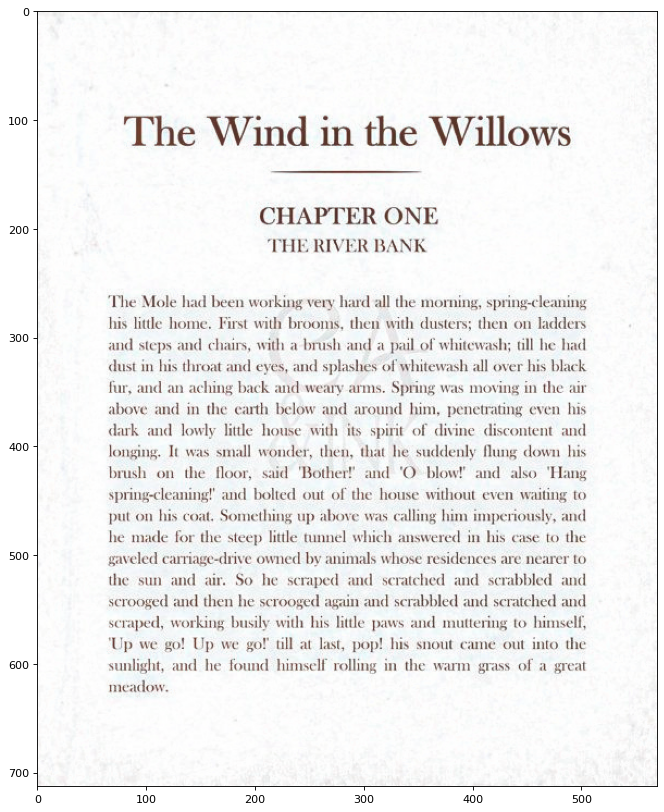

--psm 6
The Wind in the Willows

CHAPTER ONE
‘THE RIVER BANK
‘The Mole had been working-very hard all the morning, spring-cleaning
his little home. First with brooms, then with dusters; then on ladders
and steps and chairs, with a brush and a pail of whitewash; tll he had
dust in his throat and eyes, and splashes of whitewash all over his black
fur, and an aching back and weary arms. Spring was moving in the air
above and in the carth below and around him, penetrating even his
dark and lowly little house with its spirit of divine discontent and
longing. It was small wonder, then, that he suddenly flung down his
brush on the floor, said ‘Bother!’ and 'O. blow!’ and also ‘Hang
spring-cleaning!’ and bolted out of the house without even waiting to
put on his coat. Something up above was calling him imperiously, and
he made for the steep little tunnel which answered in his case to the
gaveled carriage-drive owned by animals whose residences are nearer to
the sun and air. So he scraped and s

In [8]:
process_ocr(PSM6_PATH, "book1.png", psm = 6, is_processing=True)

## PSM 7

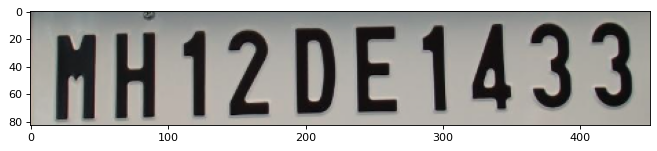

--psm 7
MH12DE1433



In [9]:
process_ocr(PSM7_PATH, "broadway.png", psm = 7, is_processing=False)

## PSM 9

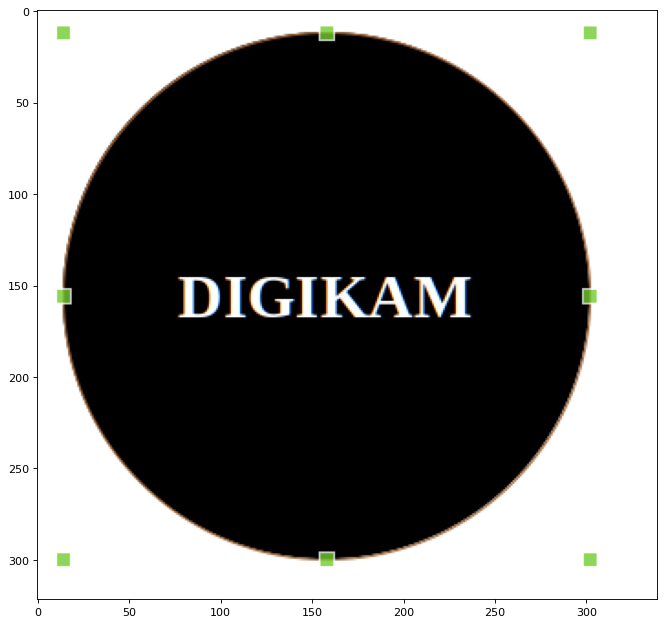

--psm 9
)



In [10]:
process_ocr(PSM9_PATH, "digikam.png", psm = 9, is_processing=False)

## PSM10

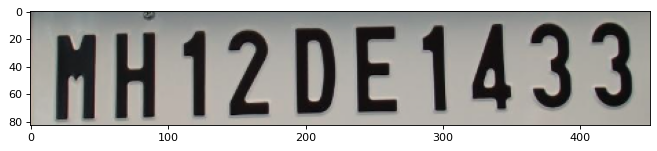

--psm 10
MH12DE1433



In [11]:
process_ocr(PSM7_PATH, "broadway.png", psm = 10, is_processing=False)

## PSM11

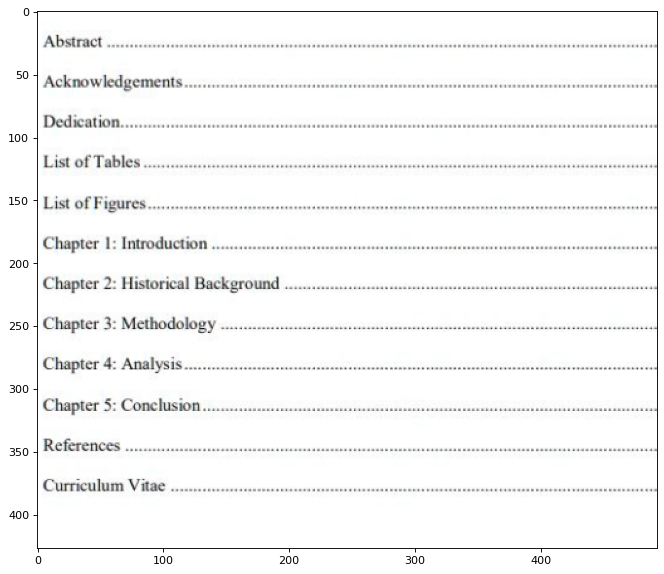

--psm 11
Abstract

Acknowledgements.

Dedication.

List of Tables.

List of Figures.

Chapter 1: Introduction .

Chapter 2: Historical Background

Chapter 3: Methodology

Chapter 4: Analysis

Chapter 5: Conclusion.

References

Curriculum Vitae



In [12]:
process_ocr(PSM11_PATH, "spart_text.png", psm = 11, is_processing=True)

## PSM 13

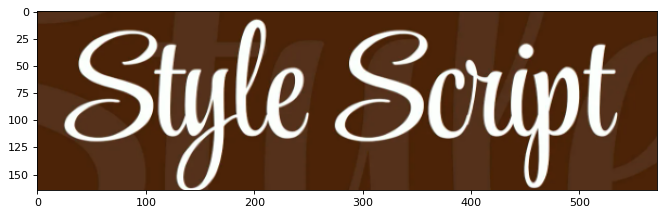

--psm 13
Style Scupt



In [13]:
process_ocr(PSM13_PATH, "test.png", psm = 13, is_processing=False)

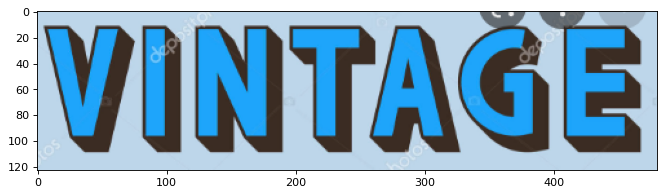

--psm 13
VINTAGE



In [14]:
process_ocr(PSM13_PATH, "test2.png", psm = 13, is_processing=False)

# Removal shadow 

In [3]:
import matplotlib.pyplot as plt

In [4]:
shadow_img = DATA_PATH + '/' + 'shadow_page_book.png'
img   = cv2.imread(shadow_img)
b,g,r = cv2.split(img) 

Text(0.5, 1.0, 'red')

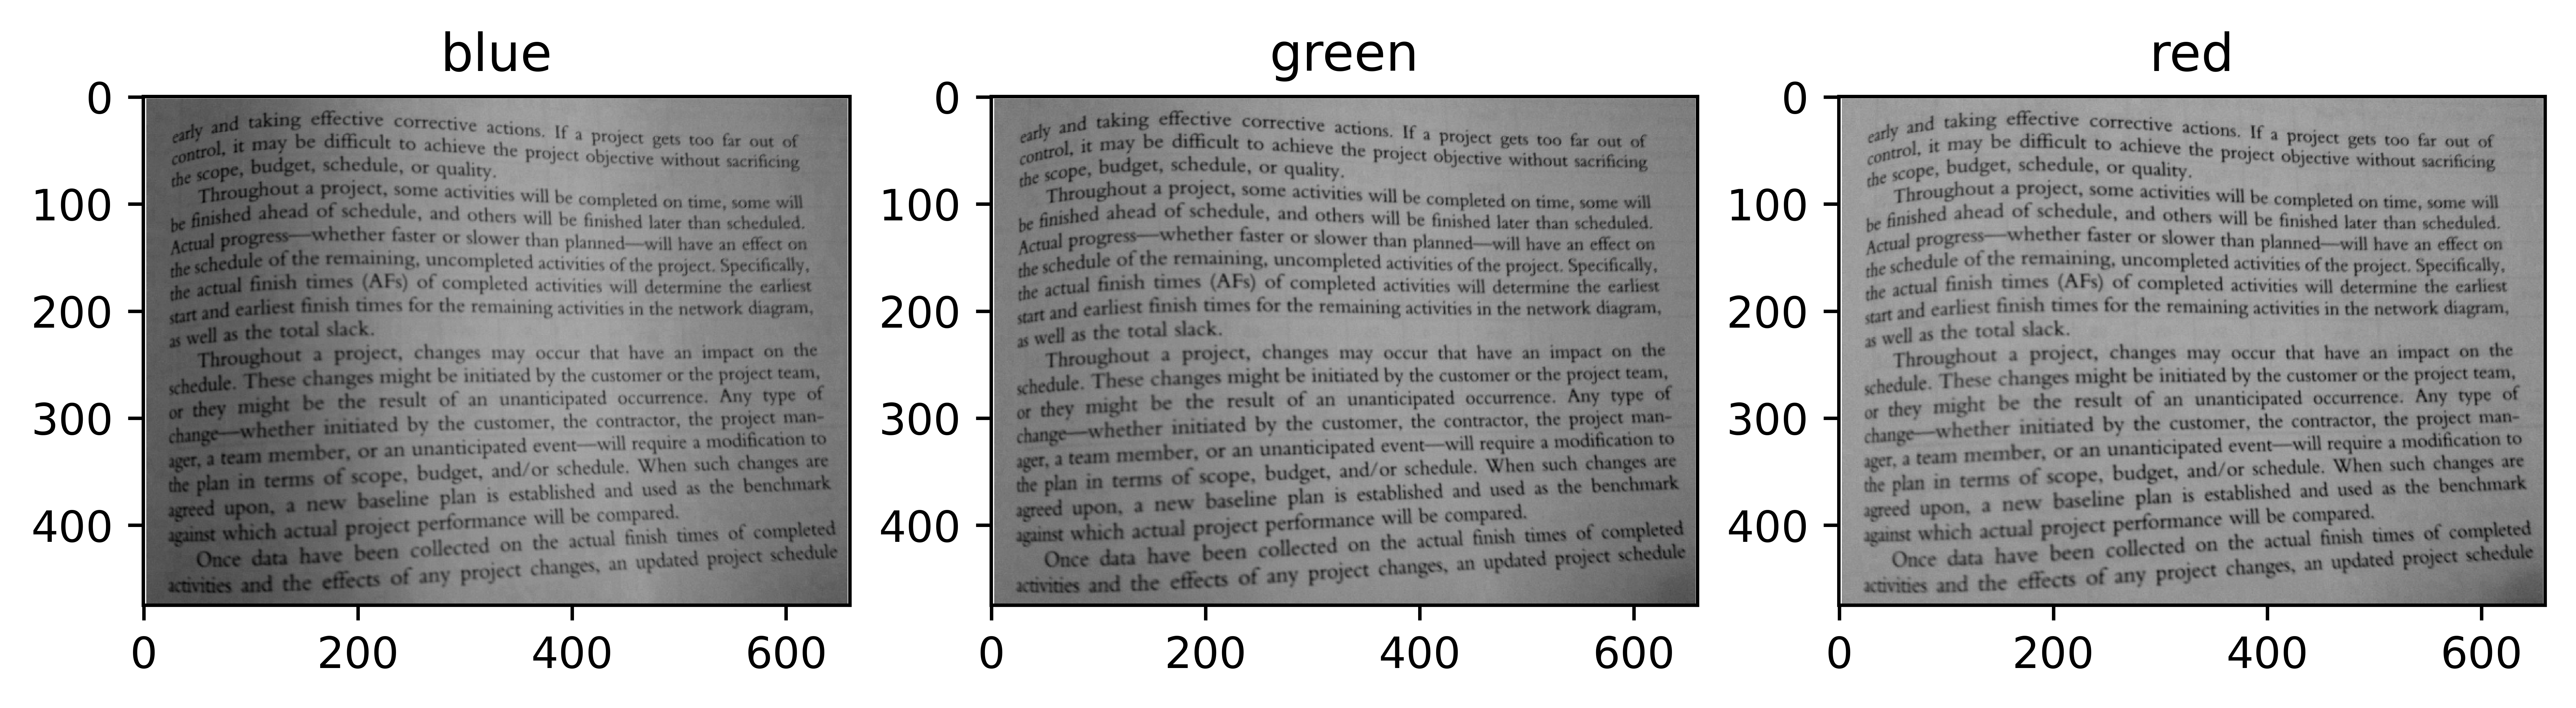

In [5]:
fig, axs = plt.subplots(1, 3)

fig.set_dpi(1000)
fig.set_size_inches(10,20)
axs[0].imshow(b, cmap='gray')
axs[0].set_title('blue')
axs[1].imshow(g, cmap='gray')
axs[1].set_title('green')
axs[2].imshow(r, cmap='gray')
axs[2].set_title('red')

Take a look a three pictures, we can see the amount of shadow in blue in channel is the most distributed

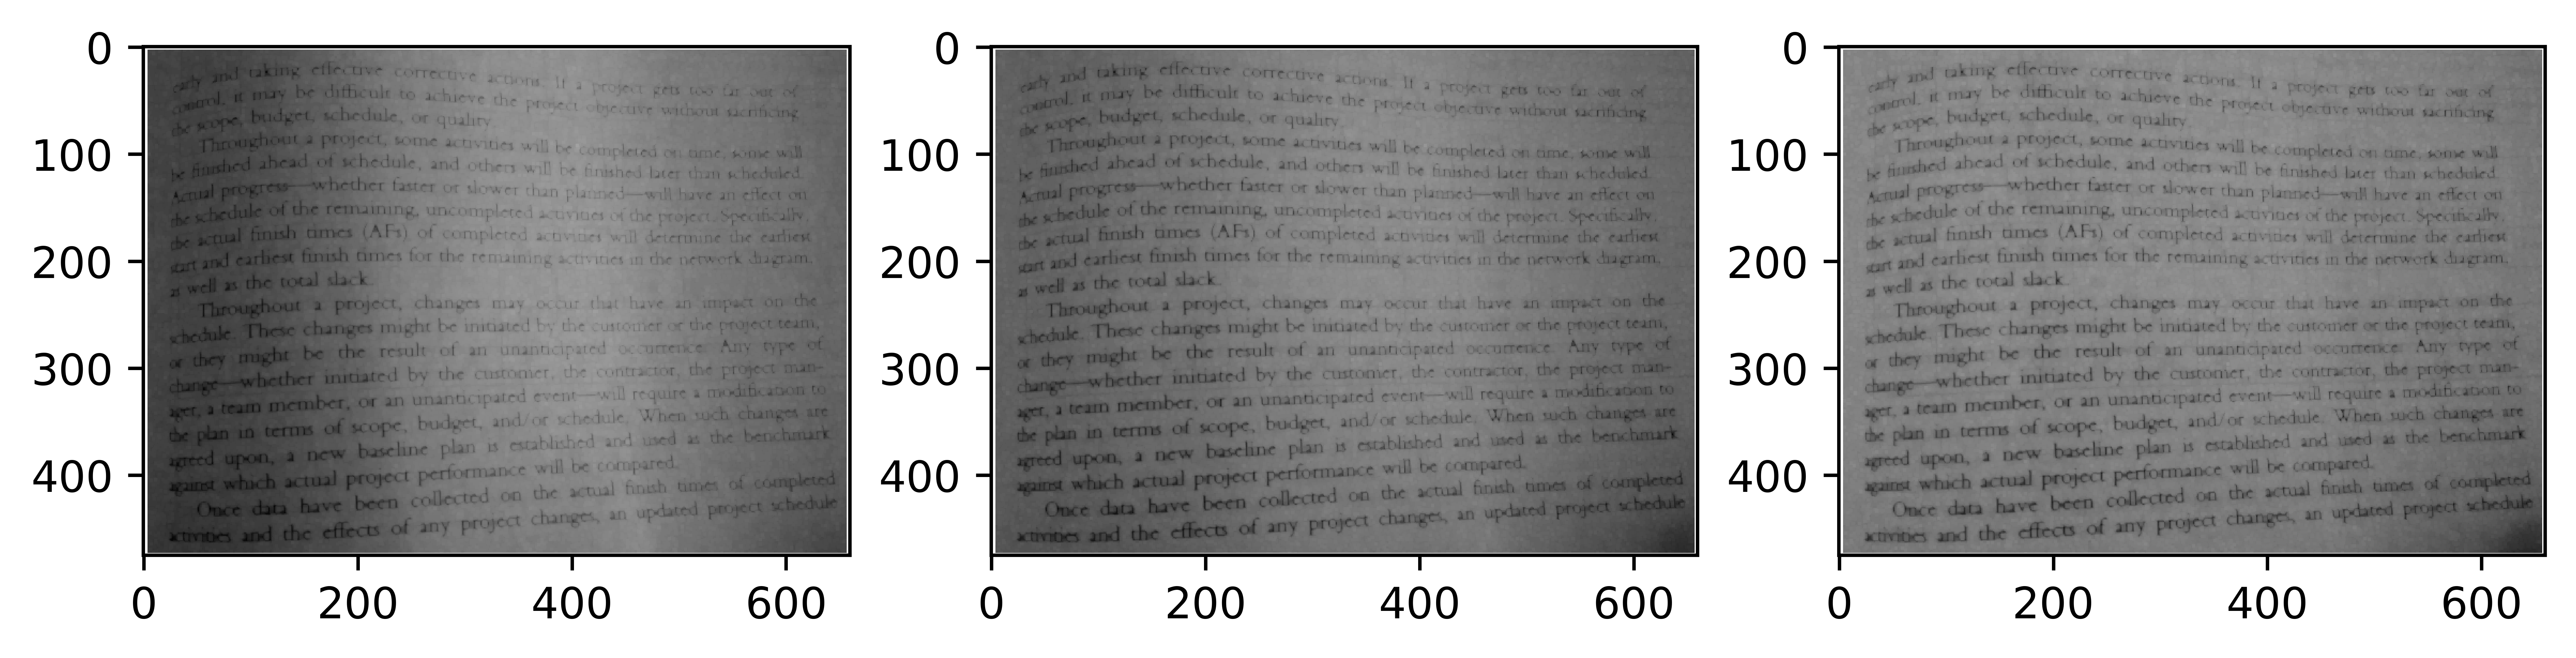

In [9]:
rgb_planes = cv2.split(img)
fig, axs = plt.subplots(1, 3)
fig.set_dpi(1000)
fig.set_size_inches(10,20)

i = 0

for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((3,3), np.uint8))
    axs[i].imshow(dilated_img, cmap = 'gray')
    i = i + 1


- Grayscale dilation of an image involes assigning to each pixel, the maximum value found over the neighborhood of the structuring element, by using a square kernel with oden dimensional 
- The dilated value of a pixel x is the maximum value of the image in the neighborhood defined

Dilation is considered as a type of morphological openration,  morphological operations are the set of operations that process images according to their shapes.
As the kernel B is scanned over the image, we compute the maximal pixel value overlapped by B and replace the image pixel in the anchor point position with that maximal value. As you can deduce, with background withe and black text, this maximizing operation causes dark regions within an image to reduce. Bigger size of kernel is, blurer text is. they are converted as noise as we need to remove. 

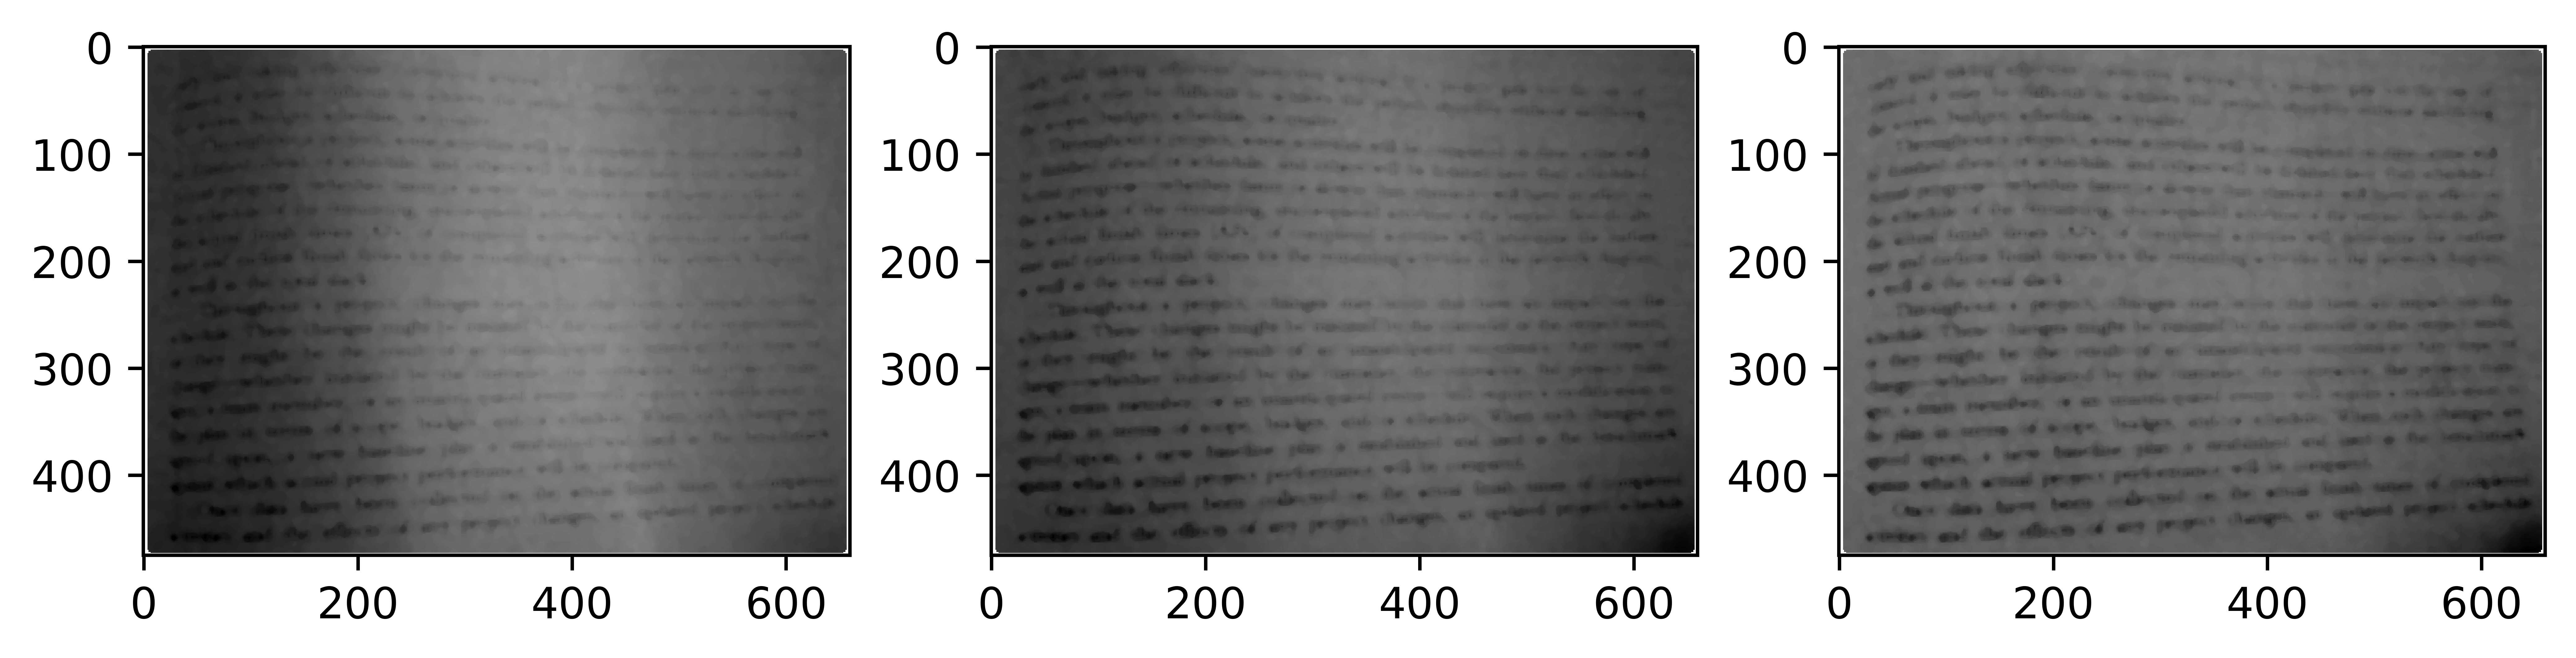

In [17]:
fig, axs = plt.subplots(1, 3)
fig.set_dpi(1000)
fig.set_size_inches(10,20)
i = 0
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((3,3), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 7)
    axs[i].imshow(bg_img, cmap = 'gray')
    i = i + 1


Gaussian Blur help smmothing image and remove noise produced from previous operations.

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_dpi(1000)
fig.set_size_inches(10,20)
i = 0
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((3,3), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 7)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    axs[i].imshow(diff_img, cmap = 'gray')
    i = i + 1


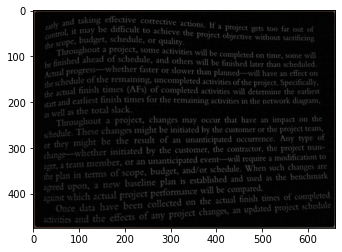

In [23]:
plt.imshow(result)